# Individual Assignment Question 2 

In [1]:
# Mazen Al Rifai
# 20198044
# MMA
# 2021W
# MMA 865
# 18 October 2020


# Submission to Question [2], Part [a]

In [2]:
import pandas as pd
import numpy as np
import re
import string
# For visualizations
import matplotlib.pyplot as plt
from collections import Counter 


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.1.


In [4]:
import os
os.getcwd()

'C:\\Users\\rifai\\OneDrive\\Queens University\\MMA\\MMA 865\\Individual Assignment'

# Load Data

In [5]:
#Import train and test data
df_train = pd.read_csv("sentiment_train.csv")
df_test = pd.read_csv("sentiment_test.csv")
print(df_train.info())
print(df_train.head())
print(df_test.info())
print(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2202 non-null   object
 1   Polarity  2202 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.5+ KB
None
                                            Sentence  Polarity
0                           Wow... Loved this place.         1
1                                 Crust is not good.         0
2          Not tasty and the texture was just nasty.         0
3  Stopped by during the late May bank holiday of...         1
4  The selection on the menu was great and so wer...         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  546 non-null    object
 1   Polarity  546 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.7+ KB
No

In [6]:
#Check if data is imbalanced
print('Train:')
df_train['Polarity'].value_counts() 


Train:


0    1113
1    1089
Name: Polarity, dtype: int64

In [7]:
#Feature Engineering

#Word Count of each review
df_train['word_count'] = df_train['Sentence'].apply(lambda x: len(str(x).split(" ")))

#Character Count of each review
df_train['char_count'] = df_train['Sentence'].str.len() ## this also includes spaces


#Character count without punctuations
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_df):
    reviewcharacters = []
    text_col = data_df['Sentence']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_df['reviewChars'] = reviewcharacters
    return data_df['reviewChars']
df_train['reviewChars'] = count_characters(df_train)

#Number of Punctuations

def numpunct(data_df):
    reviewPuncts = []
    for i in data_df['Sentence']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_df['reviewPuncts'] = reviewPuncts
    return data_df['reviewPuncts']
df_train['reviewPuncts'] = numpunct(df_train)

# Ratio of Punctuations to reviewc characters
def ratio_puncts_chars(data_df):
    return data_df['reviewPuncts'] / data_df['reviewChars']
df_train['ratiopunChar'] = ratio_puncts_chars(df_train)

#Number of Capital Words
def numcapwords(data_df):
    reviewCwords = []
    for i in data_df['Sentence']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df['reviewCwords'] = reviewCwords
    return data_df['reviewCwords']
df_train['reviewCwords'] = numcapwords(df_train)


#Sentiment Analysis 
from textblob import TextBlob
df_train['polarity_score']=df_train['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)


In [8]:
#Frequency distribution of Part of Speech Tags
import textblob
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt
df_train['noun_count'] = df_train['Sentence'].apply(lambda x: check_pos_tag(x, 'noun'))
df_train['verb_count'] = df_train['Sentence'].apply(lambda x: check_pos_tag(x, 'verb'))
df_train['adj_count'] = df_train['Sentence'].apply(lambda x: check_pos_tag(x, 'adj'))
df_train['adv_count'] = df_train['Sentence'].apply(lambda x: check_pos_tag(x, 'adv'))
df_train['pron_count'] = df_train['Sentence'].apply(lambda x: check_pos_tag(x, 'pron'))



# Custom Functions for Preprocessing and Feature Engineering

In [9]:
#pip install unidecode


In [10]:
#Text Preprocessing

# Remove ,,, from entries in name column
df_train['Sentence'] = df_train['Sentence'].str.replace(r'\,,,','')
df_train['Sentence'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df_train['Sentence']=df_train['Sentence'].apply(lambda x:expand_contractions(x))

#Lowercase letters
df_train['Sentence']=df_train['Sentence'].str.lower()

#Remove digits and words containing digits 
df_train['Sentence']=df_train['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
df_train['Sentence']=df_train['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(df_train['Sentence']).split()).value_counts()[:10]
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
df_train['Sentence'] = df_train['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_train['Sentence'].head()

#Count of rare words

freq_rare = pd.Series(' '.join(df_train['Sentence']).split()).value_counts()[-100:]
freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
df_train['Sentence'] = df_train['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_train['Sentence'].head()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_train['Sentence.nostopwords'] = df_train['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
df_train['Sentence.nostopwords.LEMMATIZED'] = df_train['Sentence.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))





array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.', ...,
       "Unfortunately, 'Cover Girl' is an example of how Hollywood used to exploit women for financial gain.  ",
       'Non-linear narration thus many flashbacks and every part are articulated quite well.  ',
       'The good cinematography also makes her and Monica Bellucci look very beautiful.  '],
      dtype=object)

the     1412
and      846
i        846
is       664
a        606
it       585
to       514
was      485
this     462
not      431
dtype: int64

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Sentence, dtype: object

kieslowski    1
hoursthe      1
freezes       1
outdoor       1
shelf         1
             ..
continues     1
procedures    1
fridays       1
pandering     1
overnite      1
Length: 100, dtype: int64

0                                 wow loved this place
1                                    crust is not good
2             not tasty and the texture was just nasty
3    stopped by during the late may bank holiday of...
4    the selection on the menu was great and so wer...
Name: Sentence, dtype: object

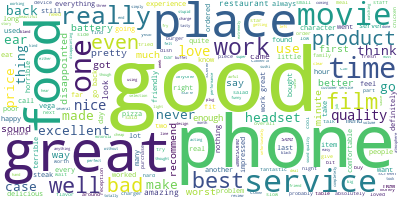

In [11]:
#Generate Word Cloud for train data
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_train['Sentence.nostopwords.LEMMATIZED'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


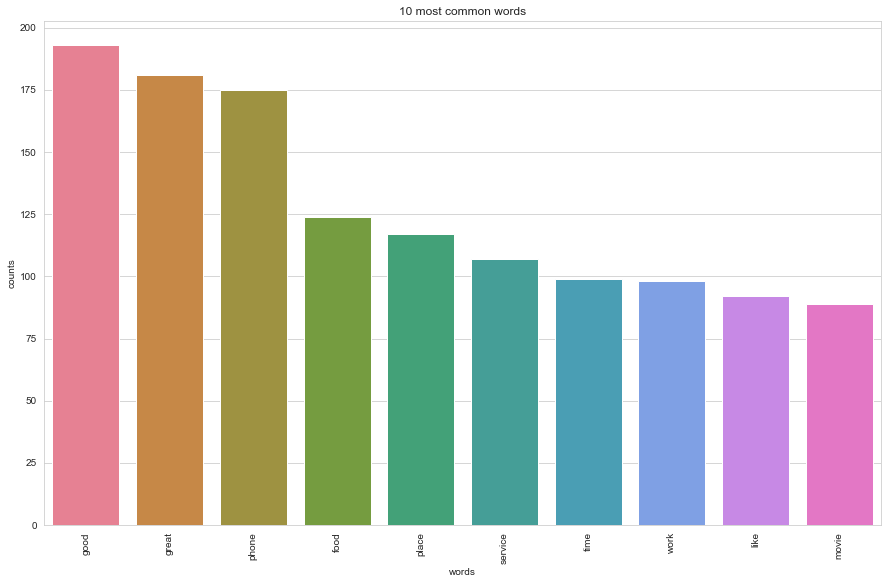

In [12]:
#Plot 10 most common words in train dataset

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_train['Sentence.nostopwords.LEMMATIZED'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [13]:
# Submission to Question [2], Part [b]

In [14]:
#Text to Vector 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=750, lowercase=True, stop_words = 'english', ngram_range=(1, 2))
#fit the vectorizers to the data.

features = vectorizer.fit_transform(df_train['Sentence.nostopwords.LEMMATIZED'])
pandaframe = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())


In [15]:
#Topic Modelling
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10,
                                      doc_topic_prior=None,
                                      topic_word_prior=None,
                                      max_iter=200, 
                                      learning_method='batch', 
                                      random_state=123,
                                      n_jobs=2,
                                      verbose=0)
lda_output = lda_model.fit(features)

# Log Likelyhood: Higher the better
ll = lda_model.score(features)

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
perp = lda_model.perplexity(features)

In [16]:
# Theta = document-topic matrix
# Beta = components_ = topic-term matrix
theta = pd.DataFrame(lda_model.transform(features))
beta = pd.DataFrame(lda_model.components_)

print('theta:')
theta.head()

#beta
print('beta:')
beta.head(20)




theta:


,0,1,2,3,4,5,6,7,8,9
0,0.037149,0.037148,0.037148,0.037148,0.037164,0.665644,0.037148,0.037148,0.037153,0.037149
1,0.050004,0.050003,0.549975,0.050010,0.050002,0.050000,0.050003,0.050000,0.050003,0.050001
2,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.549986,0.050001,0.050013
3,0.050000,0.050000,0.050000,0.050000,0.549987,0.050008,0.050000,0.050000,0.050005,0.050000
4,0.291191,0.031393,0.457647,0.031395,0.031406,0.031396,0.031392,0.031390,0.031400,0.031391


beta:


,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0.100003,0.100002,0.100001,1.982126,0.100001,0.100098,0.100006,0.100005,0.100023,0.100001,...,0.100006,0.100000,0.476107,0.100001,1.822276,0.100005,0.100004,0.100000,0.100000,0.100000
1,2.314490,0.408158,0.100002,0.100000,0.100000,0.100000,0.100024,0.100003,0.885970,0.100000,...,0.100010,0.100000,0.100003,1.338817,3.372645,0.100005,0.100001,0.100004,0.100000,0.100000
2,0.100000,0.833768,0.100003,0.100001,0.100001,0.635819,0.100000,0.100000,0.100000,0.100011,...,0.100011,0.100000,0.100000,0.100000,0.100003,0.100000,0.100006,0.100000,0.100000,0.100000
3,0.100004,0.955873,0.100003,0.640174,0.535893,0.100009,0.100000,0.100004,3.516519,0.100000,...,0.100002,0.100000,0.100001,0.100002,0.100014,0.100000,0.100000,0.100000,0.100000,0.100000
4,0.100000,2.291451,0.100011,0.100003,0.587653,0.100071,1.804783,12.705577,0.100002,1.050538,...,10.012164,0.100000,0.100001,0.100000,2.114794,1.878844,0.100010,0.100000,0.100012,0.100000
5,0.100000,3.189674,0.836974,0.100003,0.100001,0.100012,0.100000,1.361827,0.100001,0.100000,...,0.100001,2.614895,0.848776,0.100000,0.491555,0.100000,0.100000,0.100002,2.135038,2.195955
6,0.100002,0.952254,0.100002,0.100000,2.728258,0.100000,0.925205,0.100009,0.532675,0.100000,...,0.100007,0.100019,0.100004,0.100000,1.649151,0.520399,1.687123,0.100000,0.100000,0.100000
7,0.100006,0.100042,0.100002,0.100005,0.100003,0.100144,0.486113,0.100009,0.100002,0.100000,...,0.100013,0.100000,0.961705,0.100001,0.658179,0.100000,0.100025,0.100003,0.545996,0.100001
8,0.100000,0.100015,0.642450,0.100002,0.100001,0.100042,0.100030,0.100000,0.100000,3.420958,...,0.100000,0.100000,1.526328,3.047522,0.100000,0.100000,0.100000,2.421292,0.100000,0.100000
9,0.100000,0.100005,2.546555,0.100010,0.669803,0.100242,0.100000,0.100008,0.100010,0.100003,...,0.100005,0.630099,0.100014,0.100000,0.100014,0.100000,0.100008,0.100000,0.100000,0.100000


In [17]:
# Build Topic Summary
feature_names = vectorizer.get_feature_names()
weight = theta.sum(axis=0)
support50 = (theta > 0.5).sum(axis=0)
support10 = (theta > 0.1).sum(axis=0)
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms = " ".join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss.append(terms)
topic_summary = pd.DataFrame({'TopicID': range(0, len(termss)), "Support50": support50, "Support10": support10, "Weight": weight, "Terms": termss})

In [18]:
#Display topic Summary
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 0)
topic_summary

,TopicID,Support50,Support10,Weight,Terms
0,0,148,313,222.173050,bad great quite impressed think pizza
1,1,154,320,226.307361,recommend excellent product definitely car right
2,2,150,280,213.057362,good terrible restaurant food really buy
3,3,146,278,211.158591,food best happy good service say
4,4,200,352,248.847230,work service friendly amazing worth great
5,5,178,341,232.914260,great disappointed ear love place awesome
6,6,143,290,211.932333,phone problem new fantastic use bought
7,7,146,291,212.637261,money time poor waste quality horrible
8,8,137,264,206.746329,eat probably piece food day nice
9,9,153,299,216.226224,make movie long battery disappointing worst


In [19]:
# Submission to Question [2], Part [c]

In [20]:
#Select features to use in model
df1=df_train[['word_count', 'char_count','polarity_score','Polarity','reviewChars','reviewPuncts','ratiopunChar','reviewCwords','noun_count','verb_count','adj_count','adv_count','pron_count']]
df2= pd.concat([pandaframe.reset_index(drop=True), df1.reset_index(drop=True),theta], axis=1)




In [21]:
#Repace infiniti values with zero, if any to avoid errors when building the model
df2.info()
df2 = df2.replace([np.inf, -np.inf], np.nan)
df2["ratiopunChar"]=df2["ratiopunChar"].fillna(0)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Columns: 773 entries, able to 9
dtypes: float64(762), int64(11)
memory usage: 13.0 MB


In [22]:
#The data was split to two parts 80% for training and 20% for testing. 
from sklearn.model_selection import train_test_split

# For X variable, the target variable ("label") was dropped since it will be predicted using the model.
X = df2.drop(["Polarity"], axis=1)

#For y variable, all other variabes are dropped. This variable will be used for assessing the model peformance using the AUC metric
y = df2["Polarity"]
# A random seed was assigned so that our results will be reproducible on the same machine

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df2["Polarity"].values)

In [ ]:
#Logistic Regression classifier with hyperparameter tuning, other models tried: RF and DT
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


parameters_grid = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False],
        'solver':['saga','lbfgs','liblinear']}

# Create grid search object

LogReg_grid = GridSearchCV(LogisticRegression(random_state=42), parameters_grid, cv=5, n_jobs=2, scoring='f1_weighted')

# Fit on data

%time LogReg_grid.fit(X_train, y_train)

LogReg_grid.best_params_ # printing out best parameters

In [ ]:
#pip install scikit-optimize

In [ ]:
 #pip install ray[tune] tune-sklearn

In [ ]:
from tune_sklearn import TuneGridSearchCV
[2:17 p.m., 2020-10-25] Anuj: pip install tune-sklearn ray[tune]
[2:18 p.m., 2020-10-25] Anuj: pip install tune-sklearn "ray[tune]"
[2:18 p.m., 2020-10-25] Anuj: pip install scikit-optimize

In [25]:

#Setting up the Random Forest Classifier Hyperparameter Tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 50, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

print(random_grid)

# Use the RF GridSearch to search for best hyperparameters
import sklearn
from tune_sklearn import TuneGridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC

rf_model = RFC(random_state=42)
rf = TuneGridSearchCV(rf_model,random_grid, cv=3,verbose=10,n_jobs=-1,early_stopping=True,max_iters=3)

import time
start = time.time()
# Fit the random search model
rf.fit(X_train, y_train)

end = time.time()

{'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': ['auto'], 'max_depth': [10, 12, 15, 17, 20, None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


Log sync requires rsync to be installed.
The `experiment_checkpoint` operation took 0.910590410232544 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
_Trainable_cdf1e_00001,PENDING,,True,12,auto,1,2,5
_Trainable_cdf1e_00002,PENDING,,True,15,auto,1,2,5
_Trainable_cdf1e_00003,PENDING,,True,17,auto,1,2,5
_Trainable_cdf1e_00004,PENDING,,True,20,auto,1,2,5
_Trainable_cdf1e_00005,PENDING,,True,,auto,1,2,5
_Trainable_cdf1e_00006,PENDING,,True,10,auto,2,2,5
_Trainable_cdf1e_00007,PENDING,,True,12,auto,2,2,5
_Trainable_cdf1e_00008,PENDING,,True,15,auto,2,2,5
_Trainable_cdf1e_00009,PENDING,,True,17,auto,2,2,5
_Trainable_cdf1e_00010,PENDING,,True,20,auto,2,2,5


Result for _Trainable_cdf1e_00000:
  average_test_score: 0.6513344690516751
  date: 2020-10-25_14-28-05
  done: false
  experiment_id: 9c8030ac53e7477daa272f6a09a92353
  experiment_tag: 0_bootstrap=True,max_depth=10,max_features=auto,min_samples_leaf=1,min_samples_split=2,n_estimators=5
  hostname: DESKTOP-VTSDV6V
  iterations_since_restore: 1
  node_ip: 192.168.2.11
  pid: 21268
  split0_test_score: 0.75809199318569
  split1_test_score: 0.5945485519591142
  split2_test_score: 0.6013628620102215
  time_since_restore: 0.3490903377532959
  time_this_iter_s: 0.3490903377532959
  time_total_s: 0.3490903377532959
  timestamp: 1603650485
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cdf1e_00000
  
Result for _Trainable_cdf1e_00000:
  average_test_score: 0.6831345826235093
  date: 2020-10-25_14-28-06
  done: true
  experiment_id: 9c8030ac53e7477daa272f6a09a92353
  experiment_tag: 0_bootstrap=True,max_depth=10,max_features=auto,min_samples_leaf=1,min_samples_split=2,n_estima

Trial name,status,loc,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,iter,total time (s),split0_test_score,split1_test_score,split2_test_score
_Trainable_cdf1e_00008,PENDING,,True,15,auto,2,2,5,,,,,
_Trainable_cdf1e_00009,PENDING,,True,17,auto,2,2,5,,,,,
_Trainable_cdf1e_00010,PENDING,,True,20,auto,2,2,5,,,,,
_Trainable_cdf1e_00011,PENDING,,True,,auto,2,2,5,,,,,
_Trainable_cdf1e_00012,PENDING,,True,10,auto,4,2,5,,,,,
_Trainable_cdf1e_00013,PENDING,,True,12,auto,4,2,5,,,,,
_Trainable_cdf1e_00014,PENDING,,True,15,auto,4,2,5,,,,,
_Trainable_cdf1e_00015,PENDING,,True,17,auto,4,2,5,,,,,
_Trainable_cdf1e_00016,PENDING,,True,20,auto,4,2,5,,,,,
_Trainable_cdf1e_00017,PENDING,,True,,auto,4,2,5,,,,,


Result for _Trainable_cdf1e_00002:
  average_test_score: 0.6467915956842704
  date: 2020-10-25_14-28-08
  done: true
  experiment_id: 42c765d069ac4d019879a191a9ffaff7
  experiment_tag: 2_bootstrap=True,max_depth=15,max_features=auto,min_samples_leaf=1,min_samples_split=2,n_estimators=5
  hostname: DESKTOP-VTSDV6V
  iterations_since_restore: 1
  node_ip: 192.168.2.11
  pid: 29032
  split0_test_score: 0.7461669505962522
  split1_test_score: 0.5979557069846678
  split2_test_score: 0.596252129471891
  time_since_restore: 0.5291225910186768
  time_this_iter_s: 0.5291225910186768
  time_total_s: 0.5291225910186768
  timestamp: 1603650488
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cdf1e_00002
  
Result for _Trainable_cdf1e_00006:
  average_test_score: 0.6337308347529813
  date: 2020-10-25_14-28-08
  done: true
  experiment_id: af3bfe32aad34e6eaa5dc87bf30e84c0
  experiment_tag: 6_bootstrap=True,max_depth=10,max_features=auto,min_samples_leaf=2,min_samples_split=2,n_estima

The `experiment_checkpoint` operation took 2.149585008621216 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,iter,total time (s),split0_test_score,split1_test_score,split2_test_score
_Trainable_cdf1e_00015,PENDING,,True,17,auto,4,2,5,,,,,
_Trainable_cdf1e_00016,PENDING,,True,20,auto,4,2,5,,,,,
_Trainable_cdf1e_00017,PENDING,,True,,auto,4,2,5,,,,,
_Trainable_cdf1e_00018,PENDING,,True,10,auto,1,3,5,,,,,
_Trainable_cdf1e_00019,PENDING,,True,12,auto,1,3,5,,,,,
_Trainable_cdf1e_00020,PENDING,,True,15,auto,1,3,5,,,,,
_Trainable_cdf1e_00021,PENDING,,True,17,auto,1,3,5,,,,,
_Trainable_cdf1e_00008,RUNNING,,True,15,auto,2,2,5,,,,,
_Trainable_cdf1e_00009,RUNNING,,True,17,auto,2,2,5,,,,,
_Trainable_cdf1e_00010,RUNNING,,True,20,auto,2,2,5,,,,,


Result for _Trainable_cdf1e_00008:
  average_test_score: 0.6331629755820556
  date: 2020-10-25_14-28-20
  done: true
  experiment_id: 8e5d442c99c94bc48bb11444f523aea4
  experiment_tag: 8_bootstrap=True,max_depth=15,max_features=auto,min_samples_leaf=2,min_samples_split=2,n_estimators=5
  hostname: DESKTOP-VTSDV6V
  iterations_since_restore: 1
  node_ip: 192.168.2.11
  pid: 20168
  split0_test_score: 0.7018739352640545
  split1_test_score: 0.596252129471891
  split2_test_score: 0.6013628620102215
  time_since_restore: 0.43203043937683105
  time_this_iter_s: 0.43203043937683105
  time_total_s: 0.43203043937683105
  timestamp: 1603650500
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cdf1e_00008
  


Trial name,status,loc,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,iter,total time (s),split0_test_score,split1_test_score,split2_test_score
_Trainable_cdf1e_00016,PENDING,,True,20,auto,4,2,5,,,,,
_Trainable_cdf1e_00017,PENDING,,True,,auto,4,2,5,,,,,
_Trainable_cdf1e_00018,PENDING,,True,10,auto,1,3,5,,,,,
_Trainable_cdf1e_00019,PENDING,,True,12,auto,1,3,5,,,,,
_Trainable_cdf1e_00020,PENDING,,True,15,auto,1,3,5,,,,,
_Trainable_cdf1e_00021,PENDING,,True,17,auto,1,3,5,,,,,
_Trainable_cdf1e_00022,PENDING,,True,20,auto,1,3,5,,,,,
_Trainable_cdf1e_00009,RUNNING,,True,17,auto,2,2,5,,,,,
_Trainable_cdf1e_00010,RUNNING,,True,20,auto,2,2,5,,,,,
_Trainable_cdf1e_00011,RUNNING,,True,,auto,2,2,5,,,,,


Result for _Trainable_cdf1e_00012:
  average_test_score: 0.5769449176604202
  date: 2020-10-25_14-28-20
  done: true
  experiment_id: 3949d5f5c13d4ea8972b8aef812eaa06
  experiment_tag: 12_bootstrap=True,max_depth=10,max_features=auto,min_samples_leaf=4,min_samples_split=2,n_estimators=5
  hostname: DESKTOP-VTSDV6V
  iterations_since_restore: 1
  node_ip: 192.168.2.11
  pid: 13196
  split0_test_score: 0.534923339011925
  split1_test_score: 0.5945485519591142
  split2_test_score: 0.6013628620102215
  time_since_restore: 0.47085022926330566
  time_this_iter_s: 0.47085022926330566
  time_total_s: 0.47085022926330566
  timestamp: 1603650500
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cdf1e_00012
  
Result for _Trainable_cdf1e_00009:
  average_test_score: 0.6115843270868825
  date: 2020-10-25_14-28-20
  done: true
  experiment_id: 3d2a087c6abb4ec8b59966fa772c0fec
  experiment_tag: 9_bootstrap=True,max_depth=17,max_features=auto,min_samples_leaf=2,min_samples_split=2,n_es

The `experiment_checkpoint` operation took 2.373447895050049 seconds to complete, which may be a performance bottleneck.


Result for _Trainable_cdf1e_00014:
  average_test_score: 0.5621805792163543
  date: 2020-10-25_14-28-21
  done: true
  experiment_id: 77a96b019f8942fbbbe988a99f4a55a1
  experiment_tag: 14_bootstrap=True,max_depth=15,max_features=auto,min_samples_leaf=4,min_samples_split=2,n_estimators=5
  hostname: DESKTOP-VTSDV6V
  iterations_since_restore: 1
  node_ip: 192.168.2.11
  pid: 27764
  split0_test_score: 0.5212947189097104
  split1_test_score: 0.606473594548552
  split2_test_score: 0.5587734241908007
  time_since_restore: 0.3929917812347412
  time_this_iter_s: 0.3929917812347412
  time_total_s: 0.3929917812347412
  timestamp: 1603650501
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cdf1e_00014
  
Result for _Trainable_cdf1e_00013:
  average_test_score: 0.5854628052243044
  date: 2020-10-25_14-28-21
  done: true
  experiment_id: 37d6636b890c4c1e91462efda1e5a8ff
  experiment_tag: 13_bootstrap=True,max_depth=12,max_features=auto,min_samples_leaf=4,min_samples_split=2,n_esti

Trial name,status,loc,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,iter,total time (s),split0_test_score,split1_test_score,split2_test_score
_Trainable_cdf1e_00022,PENDING,,True,20,auto,1,3,5,,,,,
_Trainable_cdf1e_00023,PENDING,,True,,auto,1,3,5,,,,,
_Trainable_cdf1e_00024,PENDING,,True,10,auto,2,3,5,,,,,
_Trainable_cdf1e_00025,PENDING,,True,12,auto,2,3,5,,,,,
_Trainable_cdf1e_00026,PENDING,,True,15,auto,2,3,5,,,,,
_Trainable_cdf1e_00027,PENDING,,True,17,auto,2,3,5,,,,,
_Trainable_cdf1e_00028,PENDING,,True,20,auto,2,3,5,,,,,
_Trainable_cdf1e_00010,RUNNING,192.168.2.11:19136,True,20,auto,2,2,5,2,1.09369,0.727428,0.643952,0.681431
_Trainable_cdf1e_00011,RUNNING,192.168.2.11:6824,True,,auto,2,2,5,2,1.15378,0.705281,0.626917,0.667802
_Trainable_cdf1e_00016,RUNNING,,True,20,auto,4,2,5,,,,,


Result for _Trainable_cdf1e_00010:
  average_test_score: 0.717206132879046
  date: 2020-10-25_14-28-25
  done: true
  experiment_id: e9e8838c719a4f279430d95494f3f5b2
  experiment_tag: 10_bootstrap=True,max_depth=20,max_features=auto,min_samples_leaf=2,min_samples_split=2,n_estimators=5
  hostname: DESKTOP-VTSDV6V
  iterations_since_restore: 3
  node_ip: 192.168.2.11
  pid: 19136
  split0_test_score: 0.7325383304940375
  split1_test_score: 0.6575809199318569
  split2_test_score: 0.7614991482112436
  time_since_restore: 1.766050100326538
  time_this_iter_s: 0.6723566055297852
  time_total_s: 1.766050100326538
  timestamp: 1603650505
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cdf1e_00010
  
Result for _Trainable_cdf1e_00011:
  average_test_score: 0.7234525837592276
  date: 2020-10-25_14-28-26
  done: true
  experiment_id: ac59a4445a6f4bb1b0762a07840d3b29
  experiment_tag: 11_bootstrap=True,max_depth=None,max_features=auto,min_samples_leaf=2,min_samples_split=2,n_esti

The `experiment_checkpoint` operation took 2.6652088165283203 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,iter,total time (s),split0_test_score,split1_test_score,split2_test_score
_Trainable_cdf1e_00026,PENDING,,True,15,auto,2,3,5,,,,,
_Trainable_cdf1e_00027,PENDING,,True,17,auto,2,3,5,,,,,
_Trainable_cdf1e_00028,PENDING,,True,20,auto,2,3,5,,,,,
_Trainable_cdf1e_00029,PENDING,,True,,auto,2,3,5,,,,,
_Trainable_cdf1e_00030,PENDING,,True,10,auto,4,3,5,,,,,
_Trainable_cdf1e_00031,PENDING,,True,12,auto,4,3,5,,,,,
_Trainable_cdf1e_00032,PENDING,,True,15,auto,4,3,5,,,,,
_Trainable_cdf1e_00018,RUNNING,192.168.2.11:25676,True,10,auto,1,3,5,1,0.612932,0.727428,0.594549,0.601363
_Trainable_cdf1e_00019,RUNNING,,True,12,auto,1,3,5,,,,,
_Trainable_cdf1e_00020,RUNNING,,True,15,auto,1,3,5,,,,,


Result for _Trainable_cdf1e_00020:
  average_test_score: 0.6450880181714935
  date: 2020-10-25_14-28-32
  done: false
  experiment_id: b6c878dc1fa34fcb9f07183cab39278e
  experiment_tag: 20_bootstrap=True,max_depth=15,max_features=auto,min_samples_leaf=1,min_samples_split=3,n_estimators=5
  hostname: DESKTOP-VTSDV6V
  iterations_since_restore: 1
  node_ip: 192.168.2.11
  pid: 22188
  split0_test_score: 0.7342419080068143
  split1_test_score: 0.5996592844974447
  split2_test_score: 0.6013628620102215
  time_since_restore: 0.6508824825286865
  time_this_iter_s: 0.6508824825286865
  time_total_s: 0.6508824825286865
  timestamp: 1603650512
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cdf1e_00020
  
Result for _Trainable_cdf1e_00019:
  average_test_score: 0.6212379329926178
  date: 2020-10-25_14-28-33
  done: true
  experiment_id: 285a26b0c3c0499caba980c069c336d7
  experiment_tag: 19_bootstrap=True,max_depth=12,max_features=auto,min_samples_leaf=1,min_samples_split=3,n_es

Trial name,status,loc,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,iter,total time (s),split0_test_score,split1_test_score,split2_test_score
_Trainable_cdf1e_00030,PENDING,,True,10,auto,4,3,5,,,,,
_Trainable_cdf1e_00031,PENDING,,True,12,auto,4,3,5,,,,,
_Trainable_cdf1e_00032,PENDING,,True,15,auto,4,3,5,,,,,
_Trainable_cdf1e_00033,PENDING,,True,17,auto,4,3,5,,,,,
_Trainable_cdf1e_00034,PENDING,,True,20,auto,4,3,5,,,,,
_Trainable_cdf1e_00035,PENDING,,True,,auto,4,3,5,,,,,
_Trainable_cdf1e_00036,PENDING,,True,10,auto,1,4,5,,,,,
_Trainable_cdf1e_00023,RUNNING,,True,,auto,1,3,5,,,,,
_Trainable_cdf1e_00024,RUNNING,,True,10,auto,2,3,5,,,,,
_Trainable_cdf1e_00025,RUNNING,,True,12,auto,2,3,5,,,,,


Result for _Trainable_cdf1e_00023:
  average_test_score: 0.6575809199318569
  date: 2020-10-25_14-28-41
  done: false
  experiment_id: aca42c6e5f244630931a2bd768c3f2ea
  experiment_tag: 23_bootstrap=True,max_depth=None,max_features=auto,min_samples_leaf=1,min_samples_split=3,n_estimators=5
  hostname: DESKTOP-VTSDV6V
  iterations_since_restore: 1
  node_ip: 192.168.2.11
  pid: 20384
  split0_test_score: 0.7018739352640545
  split1_test_score: 0.5928449744463373
  split2_test_score: 0.6780238500851788
  time_since_restore: 0.5229780673980713
  time_this_iter_s: 0.5229780673980713
  time_total_s: 0.5229780673980713
  timestamp: 1603650521
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cdf1e_00023
  
Result for _Trainable_cdf1e_00025:
  average_test_score: 0.6377058489494606
  date: 2020-10-25_14-28-41
  done: true
  experiment_id: 52aea448dff14a0b9951b79a2111ff5d
  experiment_tag: 25_bootstrap=True,max_depth=12,max_features=auto,min_samples_leaf=2,min_samples_split=3,n_

The `experiment_checkpoint` operation took 2.907658338546753 seconds to complete, which may be a performance bottleneck.


Trial name,status,loc,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,iter,total time (s),split0_test_score,split1_test_score,split2_test_score
_Trainable_cdf1e_00034,PENDING,,True,20,auto,4,3,5,,,,,
_Trainable_cdf1e_00035,PENDING,,True,,auto,4,3,5,,,,,
_Trainable_cdf1e_00036,PENDING,,True,10,auto,1,4,5,,,,,
_Trainable_cdf1e_00037,PENDING,,True,12,auto,1,4,5,,,,,
_Trainable_cdf1e_00038,PENDING,,True,15,auto,1,4,5,,,,,
_Trainable_cdf1e_00039,PENDING,,True,17,auto,1,4,5,,,,,
_Trainable_cdf1e_00040,PENDING,,True,20,auto,1,4,5,,,,,
_Trainable_cdf1e_00026,RUNNING,,True,15,auto,2,3,5,,,,,
_Trainable_cdf1e_00027,RUNNING,,True,17,auto,2,3,5,,,,,
_Trainable_cdf1e_00028,RUNNING,,True,20,auto,2,3,5,,,,,


Result for _Trainable_cdf1e_00028:
  average_test_score: 0.647359454855196
  date: 2020-10-25_14-28-46
  done: false
  experiment_id: 00d8aab50def4bbb97aaf0f751f1d7ab
  experiment_tag: 28_bootstrap=True,max_depth=20,max_features=auto,min_samples_leaf=2,min_samples_split=3,n_estimators=5
  hostname: DESKTOP-VTSDV6V
  iterations_since_restore: 1
  node_ip: 192.168.2.11
  pid: 15008
  split0_test_score: 0.717206132879046
  split1_test_score: 0.6115843270868825
  split2_test_score: 0.6132879045996593
  time_since_restore: 0.6370038986206055
  time_this_iter_s: 0.6370038986206055
  time_total_s: 0.6370038986206055
  timestamp: 1603650526
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cdf1e_00028
  
Result for _Trainable_cdf1e_00026:
  average_test_score: 0.6331629755820556
  date: 2020-10-25_14-28-45
  done: true
  experiment_id: bc0d006628d24bb2b368e60e4ea10054
  experiment_tag: 26_bootstrap=True,max_depth=15,max_features=auto,min_samples_leaf=2,min_samples_split=3,n_esti

Trial name,status,loc,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,iter,total time (s),split0_test_score,split1_test_score,split2_test_score
_Trainable_cdf1e_00038,PENDING,,True,15,auto,1,4,5,,,,,
_Trainable_cdf1e_00039,PENDING,,True,17,auto,1,4,5,,,,,
_Trainable_cdf1e_00040,PENDING,,True,20,auto,1,4,5,,,,,
_Trainable_cdf1e_00041,PENDING,,True,,auto,1,4,5,,,,,
_Trainable_cdf1e_00042,PENDING,,True,10,auto,2,4,5,,,,,
_Trainable_cdf1e_00043,PENDING,,True,12,auto,2,4,5,,,,,
_Trainable_cdf1e_00044,PENDING,,True,15,auto,2,4,5,,,,,
_Trainable_cdf1e_00031,RUNNING,,True,12,auto,4,3,5,,,,,
_Trainable_cdf1e_00032,RUNNING,,True,15,auto,4,3,5,,,,,
_Trainable_cdf1e_00033,RUNNING,,True,17,auto,4,3,5,,,,,


KeyboardInterrupt: 

In [ ]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score

# Predicting performance of hypertuned Logistic Regression model


pred_val = LogReg_grid.predict(X_val)

#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_val)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_val).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

print("\nF1 Score = {:.5f}".format(f1_score(y_val, pred_val, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_val)))
print("Accuracy = {:.3f}".format(accuracy_score(y_val, pred_val)))
print()
print(classification_report(y_val, pred_val))

#1 BOW: F1=0.71202, AUC= 0.711
#2 BOW + Count Features: F1=0.7188, AUC= 0.718
#3 BOW + Count Features + Polarity: F1=0.814, AUC= 0.814

In [ ]:
#Submission to Question [2], Part [d] & Question [3]

# Test Data

In [ ]:
#Feature Engineering

#Word Count of each review
df_test['word_count'] = df_test['Sentence'].apply(lambda x: len(str(x).split(" ")))

#Character Count of each review
df_test['char_count'] = df_test['Sentence'].str.len() ## this also includes spaces

#Character count without punctuations
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']
def count_characters(data_df_test):
    reviewcharacters = []
    text_col = data_df_test['Sentence']
    for i in text_col:
        a = dict(Counter(i))
        b = {k:v for k, v in a.items() if k not in punctuation}
        c = sum(list(b.values()))
        reviewcharacters.append(c)
    data_df_test['reviewChars'] = reviewcharacters
    return data_df_test['reviewChars']
df_test['reviewChars'] = count_characters(df_test)

#Number of Punctuations

def numpunct(data_df_test):
    reviewPuncts = []
    for i in data_df_test['Sentence']:
        a = dict(Counter(i))
        b = {k:v for k,v in a.items() if k in punctuation}
        c = sum(list(b.values()))
        reviewPuncts.append(c)
    data_df_test['reviewPuncts'] = reviewPuncts
    return data_df_test['reviewPuncts']
df_test['reviewPuncts'] = numpunct(df_test)

# Ratio of Punctuations to reviewc characters
def ratio_puncts_chars(data_df_test):
    return data_df_test['reviewPuncts'] / data_df_test['reviewChars']
df_test['ratiopunChar'] = ratio_puncts_chars(df_test)

#Number of Capital Words
def numcapwords(data_df_test):
    reviewCwords = []
    for i in data_df_test['Sentence']:
        a = i.split()
        b = [word for word in a if word.isupper()]
        c = len(b)
        reviewCwords.append(c)
    data_df_test['reviewCwords'] = reviewCwords
    return data_df_test['reviewCwords']
df_test['reviewCwords'] = numcapwords(df_test)


#Sentiment Analysis 
from textblob import TextBlob
df_test['polarity_score']=df_test['Sentence'].apply(lambda x:TextBlob(x).sentiment.polarity)

#Frequency distribution of Part of Speech Tags
df_test['noun_count'] = df_test['Sentence'].apply(lambda x: check_pos_tag(x, 'noun'))
df_test['verb_count'] = df_test['Sentence'].apply(lambda x: check_pos_tag(x, 'verb'))
df_test['adj_count'] = df_test['Sentence'].apply(lambda x: check_pos_tag(x, 'adj'))
df_test['adv_count'] = df_test['Sentence'].apply(lambda x: check_pos_tag(x, 'adv'))
df_test['pron_count'] = df_test['Sentence'].apply(lambda x: check_pos_tag(x, 'pron'))


In [ ]:
#Text Preprocessing

#Word Count of each review
df_test['word_count'] = df_test['Sentence'].apply(lambda x: len(str(x).split(" ")))
df_test[['Sentence','word_count']].head()


#Character Count of each review
df_test['char_count'] = df_test['Sentence'].str.len() ## this also includes spaces
df_test[['Sentence','char_count']].head()

# Remove ,,, from entries in name column
df_test['Sentence'] = df_test['Sentence'].str.replace(r'\,,,','')
df_test['Sentence'].unique()

#Remove contractions from text reviews
# Dictionary of English Contractions
contractions_dict = { "It's":"It is","it's":"it is", "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df_test['Sentence']=df_test['Sentence'].apply(lambda x:expand_contractions(x))

#Lowercase letters
df_test['Sentence']=df_test['Sentence'].str.lower()

#Remove digits and words containing digits 
df_test['Sentence']=df_test['Sentence'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove Punctuations
df_test['Sentence']=df_test['Sentence'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#Commonly occuring words
freq = pd.Series(' '.join(df_test['Sentence']).split()).value_counts()[:10]
freq

#removal of commonly occuring irrelevant words
freq = list(freq)
df_test['Sentence'] = df_test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_test['Sentence'].head()

#Count of rare words

freq_rare = pd.Series(' '.join(df_test['Sentence']).split()).value_counts()[-100:]
freq_rare

#removal of rarely occuring irrelevant words
freq_rare = list(freq_rare)
df_test['Sentence'] = df_test['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df_test['Sentence'].head()

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_test['Sentence.nostopwords'] = df_test['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Lemmatization

from textblob import Word
df_test['Sentence.nostopwords.LEMMATIZED'] = df_test['Sentence.nostopwords'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))



In [ ]:
#Text Vectorizer  

#fit the vectorizers to the data

features3= vectorizer.transform(df_test['Sentence.nostopwords.LEMMATIZED'])
pandaframe3 = pd.DataFrame(features3.toarray(), columns=vectorizer.get_feature_names())

In [ ]:
#Topic modelling for test data set
theta_test = pd.DataFrame(lda_model.transform(features3))




In [ ]:
# Build Topic Summary
feature_names = vectorizer.get_feature_names()
weight = theta_test.sum(axis=0)
support50 = (theta_test > 0.5).sum(axis=0)
support10 = (theta_test > 0.1).sum(axis=0)
termss = list()
for topic_id, topic in enumerate(lda_model.components_):
    terms = " ".join([feature_names[i] for i in topic.argsort()[:-6 - 1:-1]])
    termss.append(terms)
topic_summary = pd.DataFrame({'TopicID': range(0, len(termss)), "Support50": support50, "Support10": support10, "Weight": weight, "Terms": termss})

In [ ]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', 0)
topic_summary

In [ ]:
#Choose Features and combine word features with other features 
df4=df_test[['word_count', 'char_count','polarity_score','Polarity','reviewChars','reviewPuncts','ratiopunChar','reviewCwords','noun_count','verb_count','adj_count','adv_count','pron_count']]
df5= pd.concat([pandaframe3.reset_index(drop=True), df4.reset_index(drop=True),theta_test], axis=1)



In [ ]:
# Prediction on test dataset
X_test = df5.drop(['Polarity'], axis=1)

# Use model to make predictions
pred_test = LogReg_grid.predict(X_test)


In [ ]:
#Check performance on test dataset

y_val=df5['Polarity']
#Get the confusion matrix
cf_matrix = confusion_matrix(y_val,pred_test)
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(y_val,pred_test).ravel()
(tn, fp, fn, tp)

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

print("\nF1 Score = {:.5f}".format(f1_score(y_val, pred_test, average="micro")))
print("AUC Score = {:.3f}".format(roc_auc_score(y_val, pred_test)))
print("Accuracy = {:.3f}".format(accuracy_score(y_val, pred_test)))

print()
print(classification_report(y_val, pred_test))

In [ ]:
# Submission to Question [2]

In [ ]:
#Generate Word Cloud for test data
long_string = ','.join(list(df_test['Sentence.nostopwords.LEMMATIZED'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [ ]:
#Plot 10 most common words in test dataset
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_test['Sentence.nostopwords.LEMMATIZED'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
# Submission to Question [3]

In [ ]:
#Generate Comparison table to determine why some predicitons were incorrect 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pred_test_pd = pd.DataFrame({'predicted': pred_test})
df_test_original = pd.read_csv("sentiment_test.csv") # Original Test data without features
df_test_original_Sentence=df_test_original.drop(columns='Polarity')

Comparison=pd.concat([df_test_original_Sentence.reset_index(drop=True),df_test.reset_index(drop=True),pred_test_pd.reset_index(drop=True),pandaframe3.reset_index(drop=True),theta_test.reset_index(drop=True)],axis=1)

Comparison.head(30)
Comparison.tail(30)

In [ ]:
Wrong=Comparison[Comparison.Polarity!=Comparison.predicted]
Wrong=Wrong.iloc[:, 0:18]
Wrong

